###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2019 L.A. Barba, N.C. Clementi

# The Complexity of getting real

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from IPython.display import Image

In [2]:
pyplot.rc('font', family='serif', size='18')

In [3]:
Image(url="https://imgs.xkcd.com/comics/complex_conjugate.png")

Every time we hear "Complex numbers" we get scared and we think "this will be complicated". However, complex numbers can be great and make our life easier. In this note book, we will learn why complex numbers exist, what properties they have, and how they using them in certain applications can turn a complex problem into a simpler one to handle. 

Complex numbers are form by the composition of a *Real* number and an *Imaginary* one. *Real* numbers, according to [Wikipedia](https://en.wikipedia.org/wiki/Real_number), are the values of continuous quantity that represent a distance along a line. But, what are *Imaginary* numbers?

An *Imaginary* number is a complex number that can be written as the multiplication of a real number and the **imaginary unit**, defined as $i^2 = -1$.

<img src="../images/imaginary_friends.jpg" style="width: 400px;"/>

### Understanding $x^2=-1$

This section was inspired by [A Visual, Intuitive Guide to Imaginary Numbers](https://betterexplained.com/articles/a-visual-intuitive-guide-to-imaginary-numbers/)

If you ever took some math course, you were probably exposed to an equation of the form $x^2 = a$ where $a>=0$. To pick an example we can say $x^2=25$, or $1 . x . x = 25$ and ask the question, 

**What transformation x, when we apply it twice, turns 1 into 25?**

There are two answers to this questions:

1. x = 5, meaning you can scale 5. 
2. x = -5, meaning scale by 5 and flip (flip is an interpretation of multiplying by a negative)

Now if we try to solve the following problem, 

$$x^2 = -1$$

what would that transformation be?

* We can't multiply by a positive number twice, since the result will be positive.

* We can't multiply by a negative number twice, because again we will get a positive number. 


#### Discuss with your neighbor

- What kind of transformation, when applied it twice, will turn 1 into -1?

If you got excited and scrolled down too much, now you know that the transformation is a **rotation**. In particular a rotation by 90°, if we apply it twice it gives as a flip from 1 to -1. 

<img src="../images/real_imag_rot.png" style="width: 400px;"/>

In this case we rotated counter clockwise to turn 1 into -1, this can be thought as multiplying by $i$ twice. We could also rotate twice in the clockwise direction, or multiply by $-i$ twice, to obtain the same result. Then, we see that there two square roots of -1, $i$ and $-i$. 

As you can see in the figure above $i$ belongs to the new dimension, this is the "imaginary dimension", and it is where numbers land when we rotate them. 

Let's explore all what we've learn by playing around with python complex numbers and some built in functions of the module `cmath`.

In python imaginary numbers are represented by the letter `j` instead of `i`. For example, the complex number `z= 1+i` would be:

In [4]:
z = 1+1j

We can check the type of `z` by using the built in function `type()`

In [5]:
type(z)

complex

We can check what is the real and imaginary parts by doing:

In [6]:
z.real

1.0

In [7]:
z.imag

1.0

Complex numbers have some properties that define them,like the "complex modulus" or "complex norm", and the angle also known as "phase" or "argument". 

The absolute square is defined as:

$$|z|^2 = z\bar{z}$$

and the modulus is defined as:

$$|z| = \sqrt{z\bar{z}} $$

where $\bar{z}$ is the complex conjugate. If $z=a+bi$ then its complex conjugate is $\bar{z}=a -bi$. 

##### Exercise

Write a function that computes the modulus of a complex number. 
Tips (you don't need to use them all): 
- To extract the real and imaginary part you can use `z.real` and `z.imag`
- There is a `numpy` built-in function that computes the complex conjugate.  

The phase of `z`, defined as the angle of the radius (from origin to `z`) with the positive real axis, can be computed as, the `arctan2(z.imag, z.real)` where `arctan2(x1,x2)` is the arc tangent of `x1/x2` choosing the proper quadrant. Likely, `numpy` has this function built-in, and you can read its documentation in the following link [`numpy.arctan2`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arctan2.html).

Then,

$$\varphi = \arctan{2}\left(\frac{b}{a}\right)$$

Let's write a function that computes the phase of any complex number.


In [8]:
def compute_phase(z):
    ''' Computes the phase of a complex number
    
    Arguments
    ---------
    z: complex number.
    
    Returns
    -------
    phi: float, angle in radians
    '''
    
    phi = numpy.arctan2(z.imag, z.real)
    
    return phi

Let's try our function:

In [9]:
z1 = 3 + 3j
compute_phase(z1)

0.78539816339744828

If we draw in a piece of paper, the coordinates of `z1` we know that the phase is 45 degrees ($\pi/4$).  

##### Exercise:

Write a new function, similar to `compute_phase()` that returns the angles in degrees. 

You might have notice that with the modulus and the phase, we can also represent a complex number. But how?

### Euler's formula

Euler's formula, is the mathematical relationship that establish the connection between trigonometric functions and the complex exponential function. 

$$e^{ix} = \cos(x) + i\sin(x)$$

In particular, when $x=\pi$ 

$$ e^{i\pi} = -1$$

If you want to see an intuitive explanation of why this happens, check the video of [3Blue1Brown - Euler's formula with introductory group theory](https://www.youtube.com/watch?v=mvmuCPvRoWQ) 

Having this information, we can represent any complex number of the form $z=a+ib$ as $z=re^{i\varphi}$ where $r=|z|$ and $\varphi$ is the phase of `z` as defined above. 

Now we have a better notion how complex numbers are represented in the space, we can use the built-in functions provided in the module [`cmath`](https://docs.python.org/3.6/library/cmath.html) to explore more complex numbers. 

Let's say we have `z2` given by:

In [10]:
import cmath

In [11]:
z2 = 4 + 3j

We can get the phase in radians by doing:

In [12]:
cmath.phase(z2)

0.6435011087932844

We can compare this result with our function `compute_phase()`

In [13]:
compute_phase(z2)

0.64350110879328437

They are pretty close right? the difference is due to the implementation of the `arctan2` that `cmath` is using. We are using the `numpy` one while `cmath` is using the `math` one.

To compute the module, we can simply use the regular built-in `abs()` function that will understand how to compute it depending on the type of our variable. 

Form the documentation of `abs()`: 

"Return the absolute value of a number. The argument may be an integer or a floating point number. If the argument is a complex number, its magnitude is returned."

In [14]:
abs(z2)

5.0

If we directly want the polar coordinates $(r, \varphi)$ we can use `cmath.polar()`

In [15]:
cmath.polar(z2)

(5.0, 0.6435011087932844)

If we have our complex number in polar representation and we would like to obtain its rectangular coordinates, we can use `cmath.rect()`. For example, let's define `z3` as the polar representation of `z2` using the information we obtained doing `cmath.polar(z2)`

In [16]:
r3, phi3 = cmath.polar(z2)

z3 = r3 * numpy.exp(1j*phi3) 

Now if we apply `cmath.rect(r3, phi3)` we get:

In [17]:
cmath.rect(r3, phi3)

(4+3j)

Using both representations let's plot in the Cartesian plane as well as the polar plane:

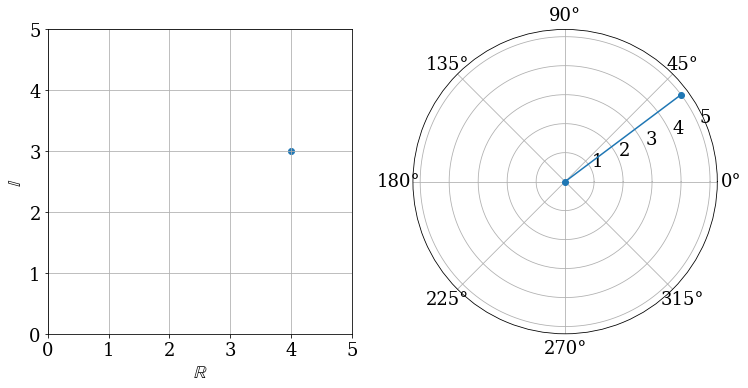

In [18]:
fig = pyplot.figure(figsize=(12,6))

ax1 = pyplot.subplot(121)

ax1.scatter(z3.real, z3.imag)
ax1.grid(True)
ax1.set_xlim(0,5)
ax1.set_ylim(0,5)
ax1.set_xlabel('$\mathbb{R}$')
ax1.set_ylabel('$\mathbb{I}$')
ax1.set_aspect('equal', 'box')

ax2 = pyplot.subplot(122, projection='polar')
ax2.plot([0,phi3],[0,r3],marker='o');
#If you were plotting only a polar plot the syntax is:
#pyplot.polar([0,phi3],[0,r3],marker='o');


### Operations and relations


- Complex numbers do not have order as we know in real numbers. Since complex numbers are two-dimensional, linear order as we know it, it doesn't apply. 

- We say that two complex numbers are equal, if only if, their real and imaginary parts are equal respectively. Given `z1` and `z2` two complex numbers, `z1` is equal to `z2` if only if `Re(z1)` = `Re(z2)` and `Im(z1)` = `Im(z2)`. If the numbers are written in polar representation, they are equal, if only if, their magnitude and phase are equal. 

#### Addition and subtraction

Two complex numbers are added (subtracted) by separately adding (subtracting) the real parts and the imaginary parts. 

`z1 = a1 + ib1`

`z2 = a2 + ib2`

`z1 + z2 = (a1 + ib1) + (a2 + ib2) = (a1 + a2) + i(b1 + b2)`

#### Multiplication

Two complex numbers `z1` and `z2` are multiplied under the distributive property rule. 

`z1 x z2 = (a1 + ib1) x (a2 + ib2)
         = a1a2 + ia1b2 + ia2b1 + i^2 b1b2
         = a1a2 + i (a1b2+a2b1) - b1b2
         = (a1a2 - b1b2) + i(a1b2 + a2b1)`
         
##### Exercise

Using python operations compare the left hand side with the right hand side of both addition and multiplication.  

#### A bit more about the conjugate operation

We can think of the conjugate of a complex number as the reflection around the real axis. Given a number $z = a+ib$ the complex conjugate denoted $\bar{z}$ or $z*$ is defined as $\bar{z} = a-ib$. 

We can define the real and imaginary part of a complex number `z` using the conjugation:

$$\text{Re}(z) = \frac{z+\bar{z}}{2}$$

$$\text{Im}(z) = \frac{z-\bar{z}}{2i}$$


#### Reciprocal and division 

To explain division we will first go over the reciprocal. The reciprocal of a non-zero complex number `z = a + ib`can be expressed as:

$$\frac{1}{z} = \frac{\bar{z}}{z\bar{z}}=\frac{\bar{z}}{|z|^2}$$

Now we can write a division of the form of `z1/z2` as:

$$\frac{z_1}{z_2}= z_1 \frac{1}{z_2} = z_1\frac{\bar{z_2}}{|z_2|^2}$$

##### Exercise

Using python operations compare the left hand side with the right hand side of the real identity, the imaginary identity and the reciprocal definition defined above.

### Patterns $i^n$

We mentioned that multiplying by $i$ a real number is like rotating it counter clockwise by 90 degrees. Then we can imagine that if we multiply by $i$ many times we will eventually land on the same place.  

Let's try it out few times and see if we get a patter:


In [21]:
for exp in range(8):
    res = (1j)**exp
    print(f'i^{exp} = {res}')

i^0 = (1+0j)
i^1 = 1j
i^2 = (-1+0j)
i^3 = (-0-1j)
i^4 = (1+0j)
i^5 = 1j
i^6 = (-1+0j)
i^7 = (-0-1j)


You might have notice that we us an "f" before the string, this is for formated strings, which allows us to insert variables in a string and they'll take the value at the moment of execution. To read and learn more about formated strings you can check out this link [Python 3: An Intro to f-strings](http://www.blog.pythonlibrary.org/2018/03/13/python-3-an-intro-to-f-strings/)

But, that is not the only thing you might have noticed in the piece of code above. If you pay attention to the out put, you'll see that the patter follows as `[1, i, -1, -i]` and it repeats. This is because of the successive rotations of 90 degrees, if we start at 1 ($i^0$) on the real axis, and rotate by 90 degrees counter clockwise four times ($i^4$) we will land again on 1 on the real axis.

<img src="../images/power_i_pattern.png" style="width: 400px;"/>

##### Exercise

If we have $i^{355}$ how can we know what is the result of that operation without explicitly calculating it? 

Tips: 
- Think of the pattern
- You might want to check how the modulo operation works, the `%` symbol.

#### Challenge

Write a function that computes any power of $i$ without directly computing it.

#### References

- https://betterexplained.com/articles/a-visual-intuitive-guide-to-imaginary-numbers/
- https://en.wikipedia.org/wiki/Complex_number
